This notebook is a copy of [giotto-tda classifying handwritten digits example](https://giotto-ai.github.io/gtda-docs/0.5.1/notebooks/MNIST_classification.html). 

In [541]:
# Load the MNIST dataset
import pandas as pd
df = pd.read_csv('./mnist_784.csv')

In [542]:
# Split into features and label
X, y = (df.iloc[:,:-1], df.iloc[:,-1])

In [543]:
# Display an instance
import numpy as np
import matplotlib.pyplot as plt
from gtda.plotting import plot_heatmap

In [544]:
def show_image(image, title=None, saving=None):
    """
    Display and optionally save a single 2D grayscale image
    at publication quality (300 dpi).
    """
    plt.figure(figsize=(3, 3))  # control size in inches
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

    if title:
        plt.title(title)

    if saving:
        plt.savefig(
            saving, 
            dpi=300, 
            bbox_inches='tight',  # trims whitespace
            pad_inches=0          # no padding
        )
    plt.show()

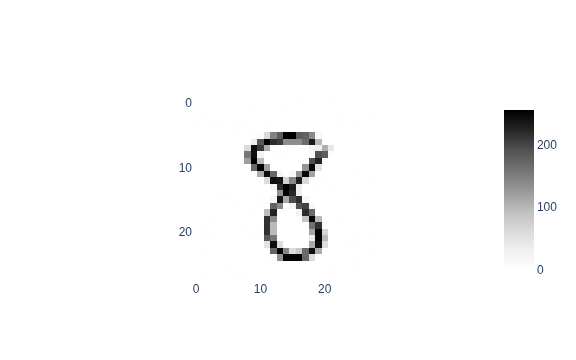

In [545]:
# Select index of all 8 images, show the 10th picture
im8_idx = np.flatnonzero(y == 8)[10]
img8 = np.array(X.iloc[im8_idx,:]).reshape(28,28)
plot_heatmap(img8)

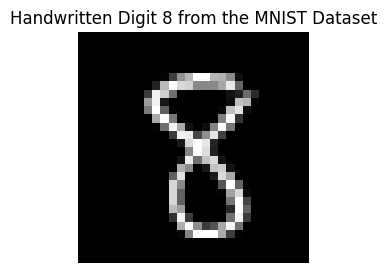

In [546]:
show_image(img8,title="Handwritten Digit 8 from the MNIST Dataset", saving="img8_mnist.png")

In [547]:
# Split dataset into training and testing set
from sklearn.model_selection import train_test_split

train_size, test_size = 60, 10

# Reshape to (n_samples, n_pixels_x, n_pixels_y)
X = np.array(X).reshape((-1, 28, 28))
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=123
)

In [548]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (60, 28, 28), y_train shape: (60,)
X_test shape: (10, 28, 28), y_test shape: (10,)


In [549]:
from experiment.view import split_to_quadrants

In [550]:
subsets = split_to_quadrants(X_train)

In [551]:
# numero 8 en 9

In [552]:
img8_tl = subsets['top_left'][9]
img8_tr = subsets['top_right'][9]
img8_bl = subsets['bottom_left'][9]
img8_br = subsets['bottom_right'][9]

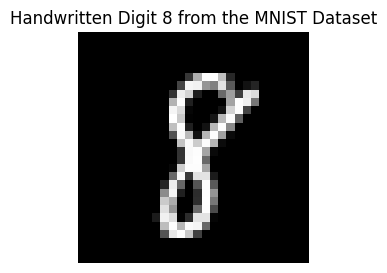

In [553]:
show_image(X_train[9],title="Handwritten Digit 8 from the MNIST Dataset", saving="img8_mnist.png")

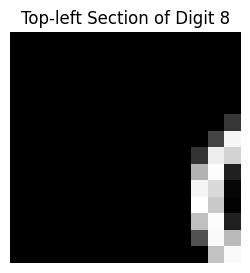

In [554]:
show_image(img8_tl, "Top-left Section of Digit 8", saving="img8_tl_mnist.png")

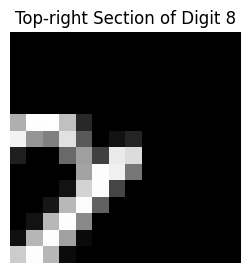

In [555]:
show_image(img8_tr, "Top-right Section of Digit 8", saving="img8_tr_mnist.png")

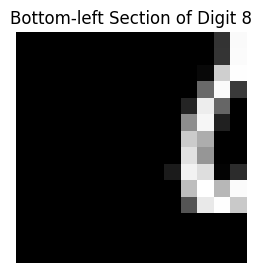

In [556]:
show_image(img8_bl, "Bottom-left Section of Digit 8", saving="img8_bl_mnist.png")

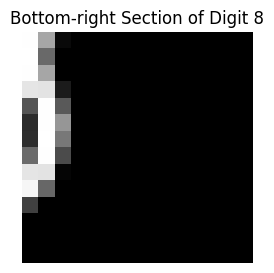

In [557]:
show_image(img8_br, "Bottom-right Section of Digit 8", saving="img8_br_mnist.png")

In [558]:
# Binarize the image 
from gtda.images import Binarizer

binarizer = Binarizer(threshold=0.4)
img8_binarized = binarizer.fit_transform(X_train[9][None, :, :])

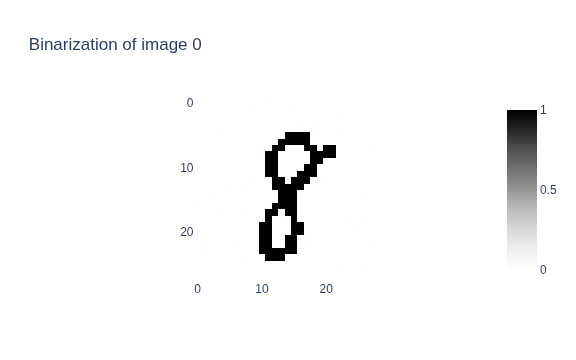

In [559]:
binarizer.plot(img8_binarized)

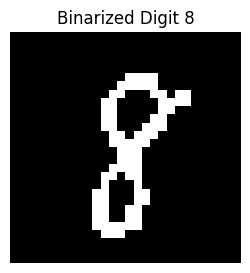

In [560]:
show_image(img8_binarized.reshape(28,28), title="Binarized Digit 8", saving="img8_tda_binarized.png")

In [561]:
# Apply radial filtration 

# Coordenates
"""
        np.ndarray: A (9, 2) array of unique (x, y) coordinates:
            [[ 6,  6], [13,  6], [20,  6],
             [ 6, 13], [13, 13], [20, 13],
             [ 6, 20], [13, 20], [20, 20]]
"""

from gtda.images import RadialFiltration
radial_filtration = RadialFiltration(center=np.array([6, 6]))
img8_radial_1 = radial_filtration.fit_transform(img8_binarized)



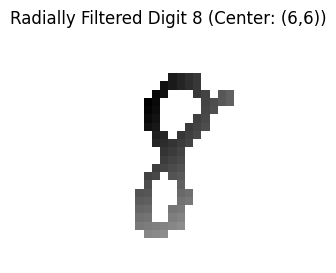

In [562]:
show_image(img8_radial_1.reshape(28,28), title="Radially Filtered Digit 8 (Center: (6,6))", saving="img8_tda_radial_66.png")

In [563]:
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence(n_jobs=-1)

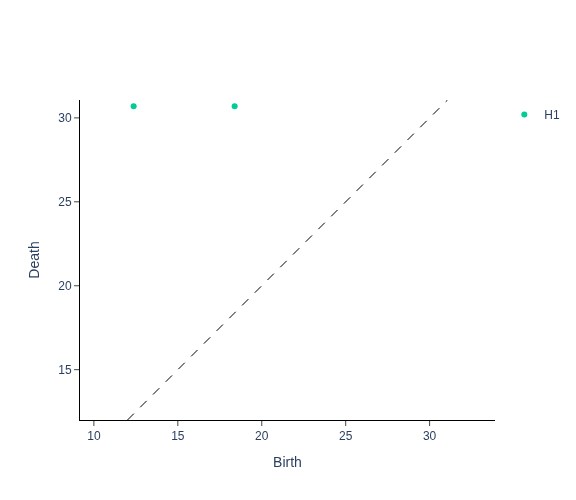

In [564]:
img8_radial_1_pd = cubical_persistence.fit_transform(img8_radial_1)

cubical_persistence.plot(img8_radial_1_pd)

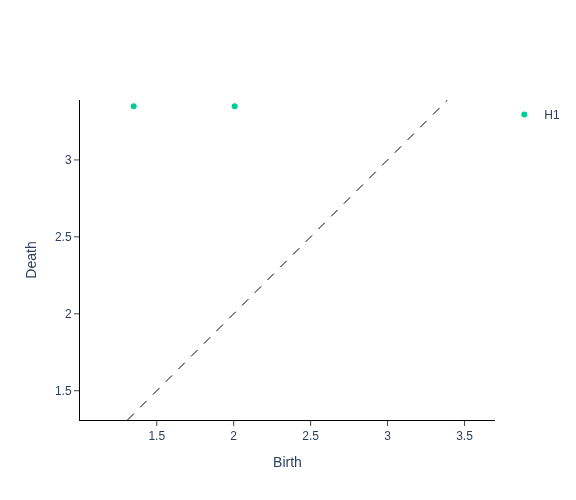

In [565]:
from gtda.diagrams import Scaler

scaler = Scaler()
img8_radial_1_pd = scaler.fit_transform(img8_radial_1_pd)

scaler.plot(img8_radial_1_pd)

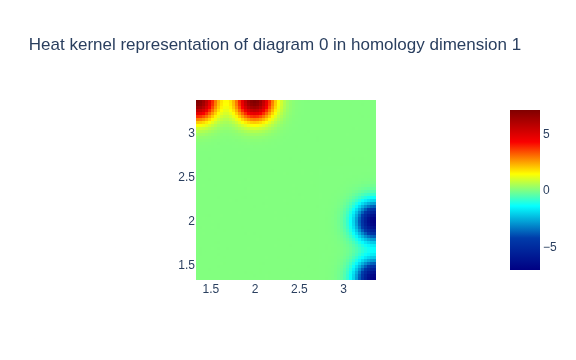

In [566]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
img8_radial_1_heat = heat.fit_transform(img8_radial_1_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_1_heat, homology_dimension_idx=1, colorscale='jet')

In [567]:
from gtda.diagrams import Amplitude, PersistenceEntropy

In [568]:
amplitude = Amplitude(metric="heat",n_jobs=-1)

In [569]:
amplitude.fit_transform(img8_radial_1_pd)

array([[0.        , 4.06404638]])

In [570]:
entropy = PersistenceEntropy(n_jobs=-1)

In [571]:
entropy.fit_transform(img8_radial_1_pd)

array([[-1.        ,  0.97202003]])

In [572]:
# Combine persistent entropy and amplitude

In [573]:
[-1.        ,  0.97202003] + [0.        , 4.06404638]

[-1.0, 0.97202003, 0.0, 4.06404638]

In [574]:
radial_filtration = RadialFiltration(center=np.array([13, 6]))
img8_radial_2 = radial_filtration.fit_transform(img8_binarized)

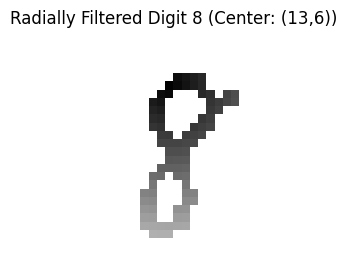

In [575]:
show_image(img8_radial_2.reshape(28,28), title="Radially Filtered Digit 8 (Center: (13,6))", saving="img8_tda_radial_136.png")

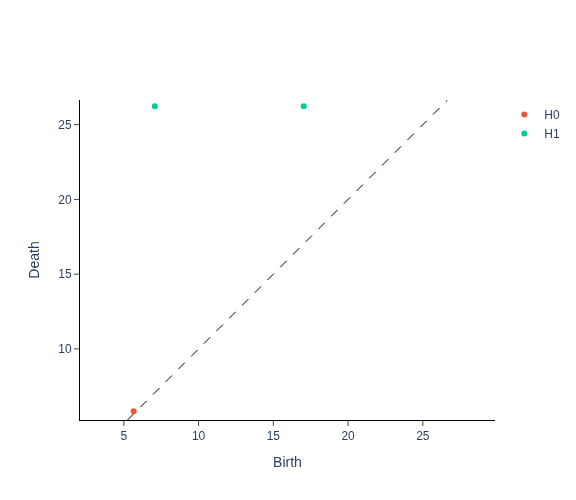

In [576]:
img8_radial_2_pd = cubical_persistence.fit_transform(img8_radial_2)

cubical_persistence.plot(img8_radial_2_pd)

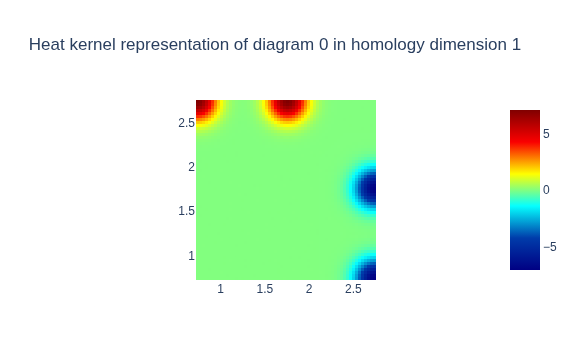

In [577]:
img8_radial_2_pd = scaler.fit_transform(img8_radial_2_pd)
img8_radial_2_heat = heat.fit_transform(img8_radial_2_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_2_heat, homology_dimension_idx=1, colorscale='jet')

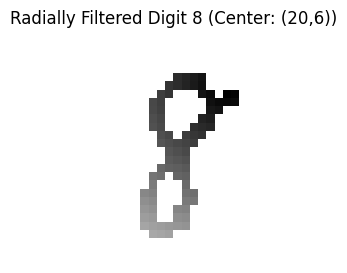

In [578]:
radial_filtration = RadialFiltration(center=np.array([20, 6]))
img8_radial_3 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_3.reshape(28,28), title="Radially Filtered Digit 8 (Center: (20,6))", saving="img8_tda_radial_206.png")

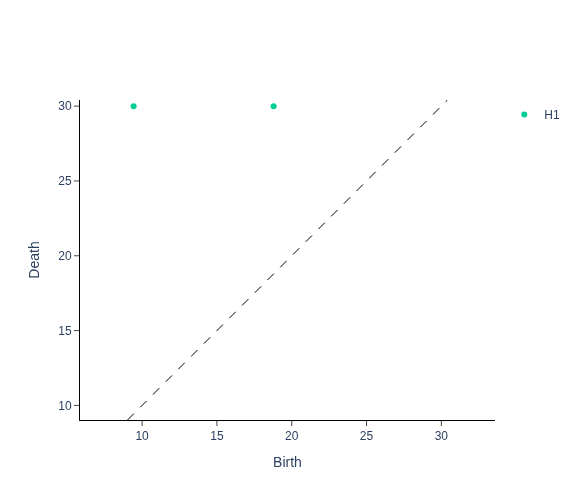

In [579]:
img8_radial_3_pd = cubical_persistence.fit_transform(img8_radial_3)

cubical_persistence.plot(img8_radial_3_pd)

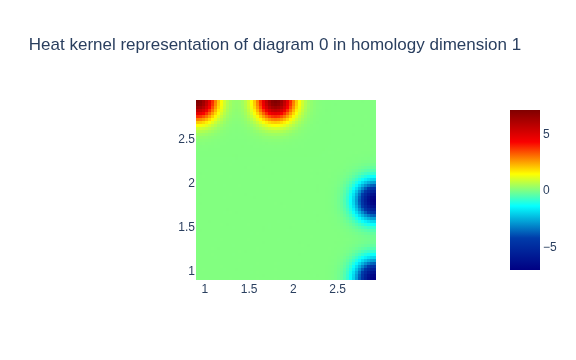

In [580]:
img8_radial_3_pd = scaler.fit_transform(img8_radial_3_pd)
img8_radial_3_heat = heat.fit_transform(img8_radial_3_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_3_heat, homology_dimension_idx=1, colorscale='jet')

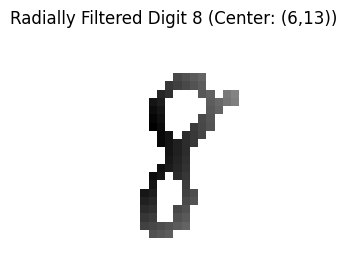

In [581]:
radial_filtration = RadialFiltration(center=np.array([6, 13]))
img8_radial_4 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_4.reshape(28,28), title="Radially Filtered Digit 8 (Center: (6,13))", saving="img8_tda_radial_613.png")

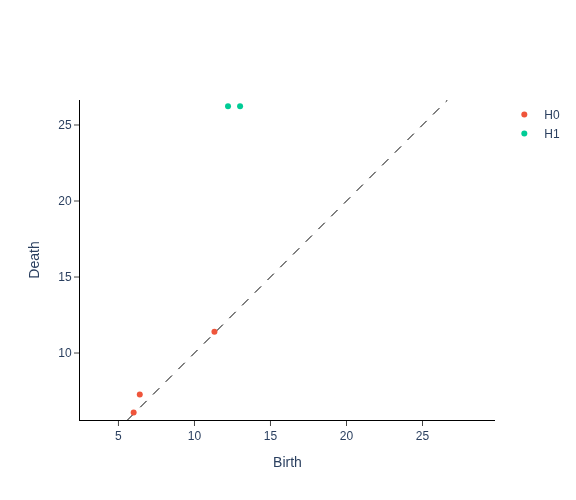

In [582]:
img8_radial_4_pd = cubical_persistence.fit_transform(img8_radial_4)

cubical_persistence.plot(img8_radial_4_pd)

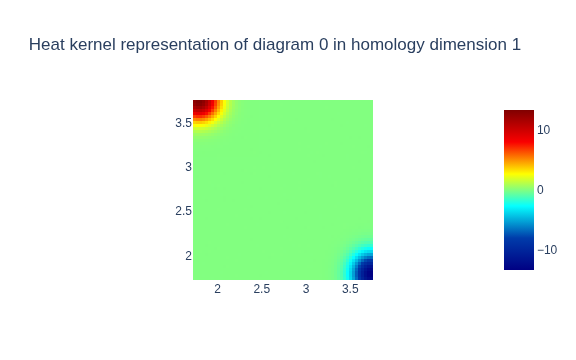

In [583]:
img8_radial_4_pd = scaler.fit_transform(img8_radial_4_pd)
img8_radial_4_heat = heat.fit_transform(img8_radial_4_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_4_heat, homology_dimension_idx=1, colorscale='jet')

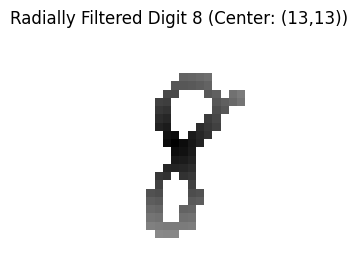

In [584]:
radial_filtration = RadialFiltration(center=np.array([13, 13]))
img8_radial_5 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_5.reshape(28,28), title="Radially Filtered Digit 8 (Center: (13,13))", saving="img8_tda_radial_1313.png")

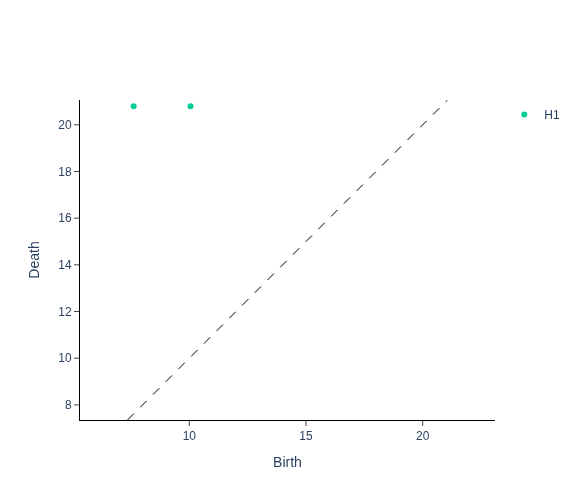

In [585]:
img8_radial_5_pd = cubical_persistence.fit_transform(img8_radial_5)

cubical_persistence.plot(img8_radial_5_pd)

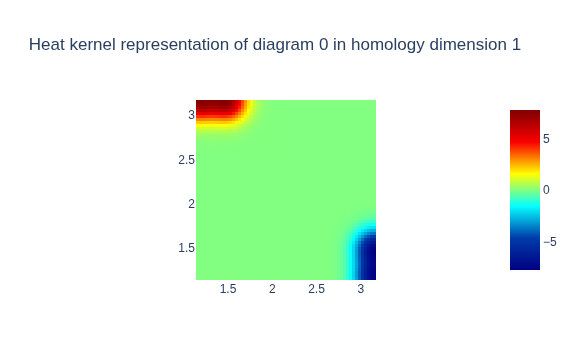

In [586]:
img8_radial_5_pd = scaler.fit_transform(img8_radial_5_pd)
img8_radial_5_heat = heat.fit_transform(img8_radial_5_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_5_heat, homology_dimension_idx=1, colorscale='jet')

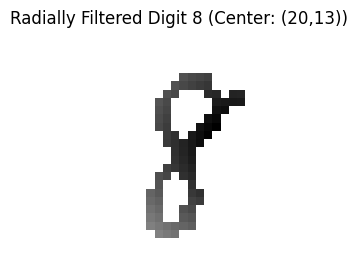

In [587]:
radial_filtration = RadialFiltration(center=np.array([20, 13]))
img8_radial_6 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_6.reshape(28,28), title="Radially Filtered Digit 8 (Center: (20,13))", saving="img8_tda_radial_2013.png")

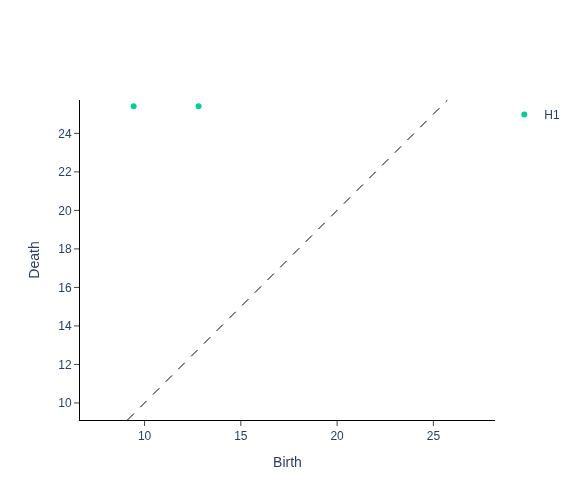

In [588]:
img8_radial_6_pd = cubical_persistence.fit_transform(img8_radial_6)

cubical_persistence.plot(img8_radial_6_pd)

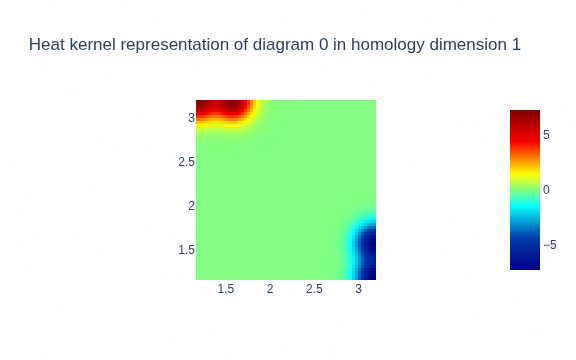

In [589]:
img8_radial_6_pd = scaler.fit_transform(img8_radial_6_pd)
img8_radial_6_heat = heat.fit_transform(img8_radial_6_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_6_heat, homology_dimension_idx=1, colorscale='jet')

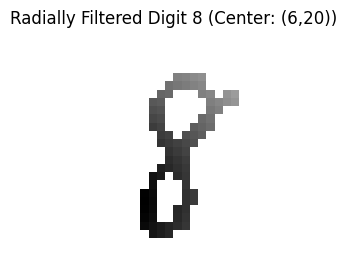

In [590]:
radial_filtration = RadialFiltration(center=np.array([6, 20]))
img8_radial_7 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_7.reshape(28,28), title="Radially Filtered Digit 8 (Center: (6,20))", saving="img8_tda_radial_620.png")

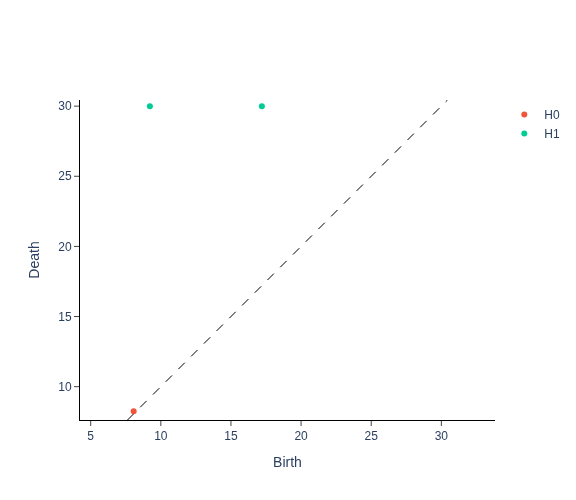

In [591]:
img8_radial_7_pd = cubical_persistence.fit_transform(img8_radial_7)

cubical_persistence.plot(img8_radial_7_pd)

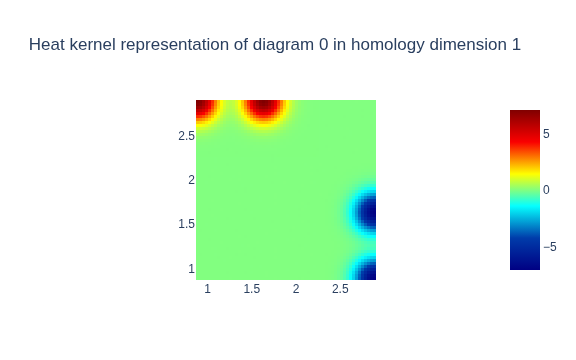

In [592]:
img8_radial_7_pd = scaler.fit_transform(img8_radial_7_pd)
img8_radial_7_heat = heat.fit_transform(img8_radial_7_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_7_heat, homology_dimension_idx=1, colorscale='jet')

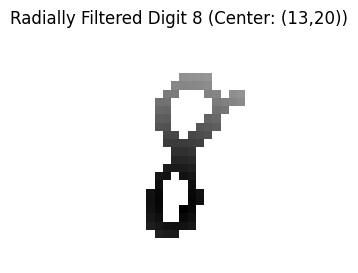

In [593]:
radial_filtration = RadialFiltration(center=np.array([13, 20]))
img8_radial_8 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_8.reshape(28,28), title="Radially Filtered Digit 8 (Center: (13,20))", saving="img8_tda_radial_1320.png")

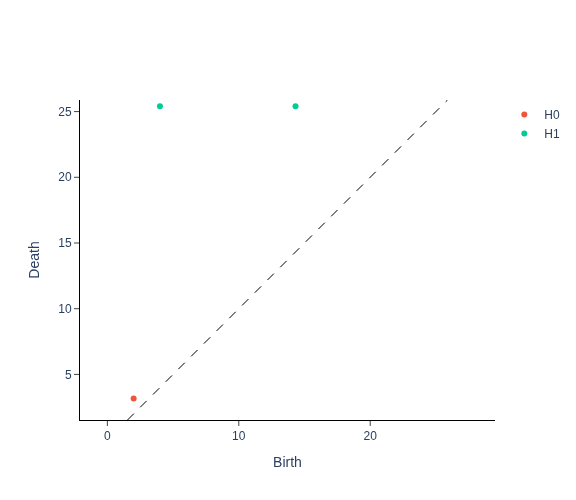

In [594]:
img8_radial_8_pd = cubical_persistence.fit_transform(img8_radial_8)

cubical_persistence.plot(img8_radial_8_pd)

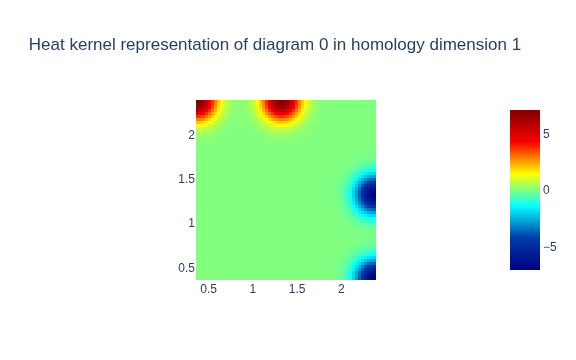

In [595]:
img8_radial_8_pd = scaler.fit_transform(img8_radial_8_pd)
img8_radial_8_heat = heat.fit_transform(img8_radial_8_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_8_heat, homology_dimension_idx=1, colorscale='jet')

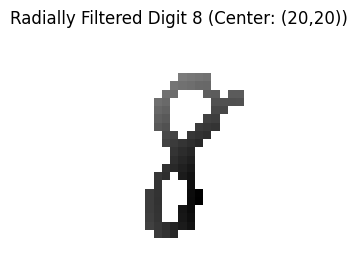

In [596]:
radial_filtration = RadialFiltration(center=np.array([20, 20]))
img8_radial_9 = radial_filtration.fit_transform(img8_binarized)
show_image(img8_radial_9.reshape(28,28), title="Radially Filtered Digit 8 (Center: (20,20))", saving="img8_tda_radial_2020.png")

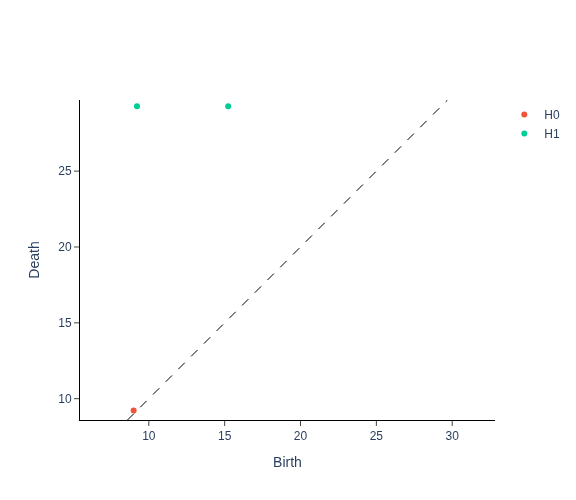

In [597]:
img8_radial_9_pd = cubical_persistence.fit_transform(img8_radial_9)

cubical_persistence.plot(img8_radial_9_pd)

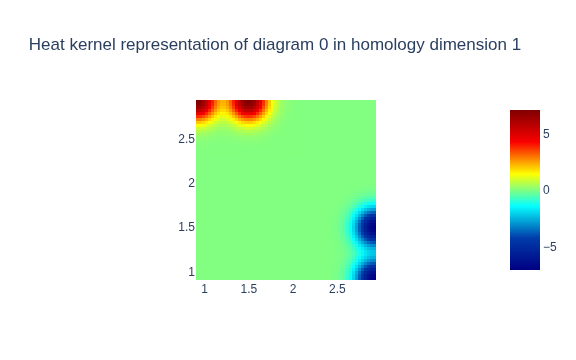

In [598]:
img8_radial_9_pd = scaler.fit_transform(img8_radial_9_pd)
img8_radial_9_heat = heat.fit_transform(img8_radial_9_pd)

# Visualise the heat kernel for H1
heat.plot(img8_radial_9_heat, homology_dimension_idx=1, colorscale='jet')

In [599]:
# Apply height filtration 

"""
        np.ndarray: A (8, 2) array of 8 unique direction vectors. Each vector 
        is a 2D coordinate with values ranging from -1 to 1, excluding (0, 0):
        [
            [-1, -1], [-1,  0], [-1,  1],
            [ 0, -1], [ 0,  1],
            [ 1, -1], [ 1,  0], [ 1,  1]
        ]
"""

from gtda.images import HeightFiltration
height_filtration = HeightFiltration(np.array([-1, -1]))
img8_height_1 = height_filtration.fit_transform(img8_binarized)

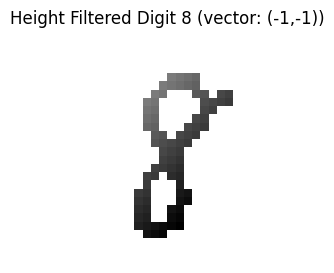

In [600]:
show_image(img8_height_1.reshape(28,28), title="Height Filtered Digit 8 (vector: (-1,-1))", saving="img8_tda_height_1.png")

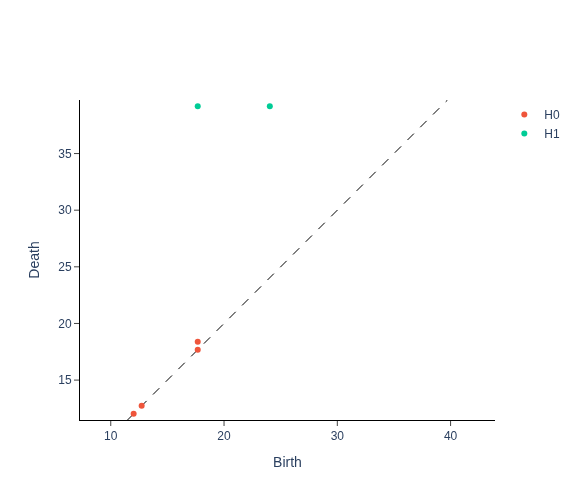

In [601]:
img8_height_1_pd = cubical_persistence.fit_transform(img8_height_1)

cubical_persistence.plot(img8_height_1_pd)

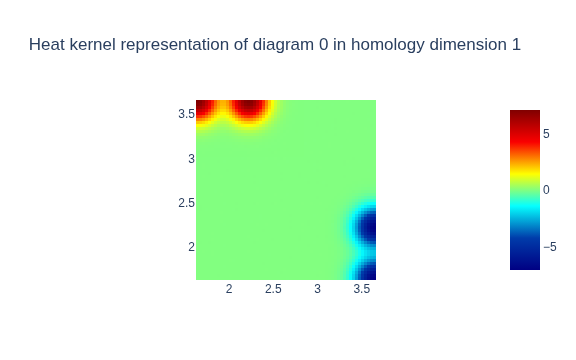

In [602]:
img8_height_1_pd = scaler.fit_transform(img8_height_1_pd)
img8_height_1_pd_heat = heat.fit_transform(img8_height_1_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_1_pd_heat, homology_dimension_idx=1, colorscale='jet')

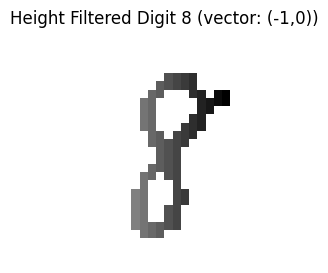

In [603]:
height_filtration = HeightFiltration(np.array([-1, 0]))
img8_height_2 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_2.reshape(28,28), title="Height Filtered Digit 8 (vector: (-1,0))", saving="img8_tda_height_2.png")

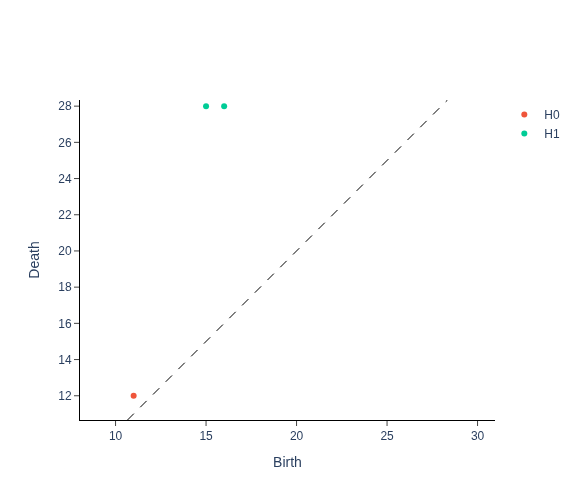

In [604]:
img8_height_2_pd = cubical_persistence.fit_transform(img8_height_2)

cubical_persistence.plot(img8_height_2_pd)

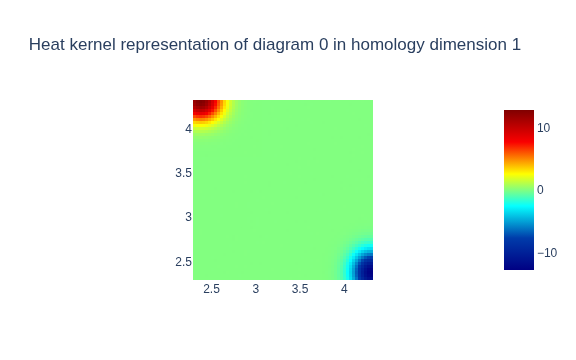

In [605]:
img8_height_2_pd = scaler.fit_transform(img8_height_2_pd)
img8_height_2_pd_heat = heat.fit_transform(img8_height_2_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_2_pd_heat, homology_dimension_idx=1, colorscale='jet')

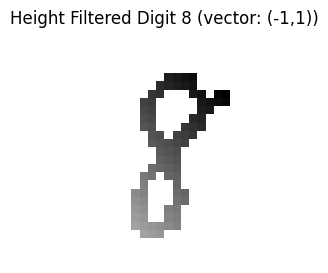

In [606]:
height_filtration = HeightFiltration(np.array([-1, 1]))
img8_height_3 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_3.reshape(28,28), title="Height Filtered Digit 8 (vector: (-1,1))", saving="img8_tda_height_3.png")

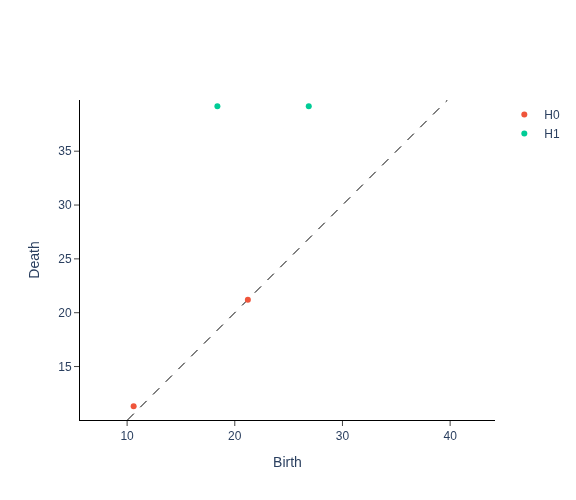

In [607]:
img8_height_3_pd = cubical_persistence.fit_transform(img8_height_3)

cubical_persistence.plot(img8_height_3_pd)

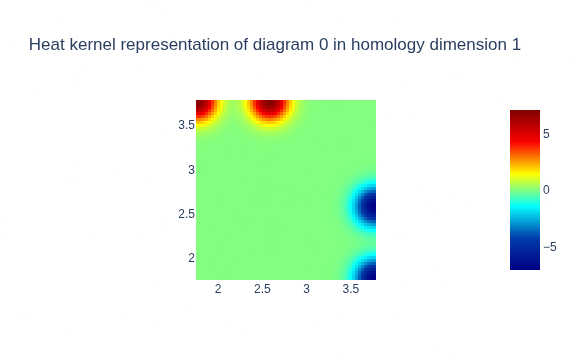

In [608]:
img8_height_3_pd = scaler.fit_transform(img8_height_3_pd)
img8_height_3_pd_heat = heat.fit_transform(img8_height_3_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_3_pd_heat, homology_dimension_idx=1, colorscale='jet')

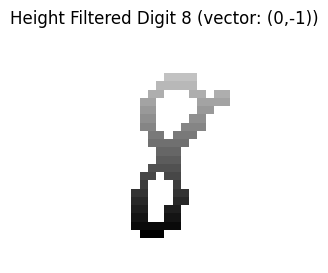

In [609]:
height_filtration = HeightFiltration(np.array([0, -1]))
img8_height_4 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_4.reshape(28,28), title="Height Filtered Digit 8 (vector: (0,-1))", saving="img8_tda_height_4.png")

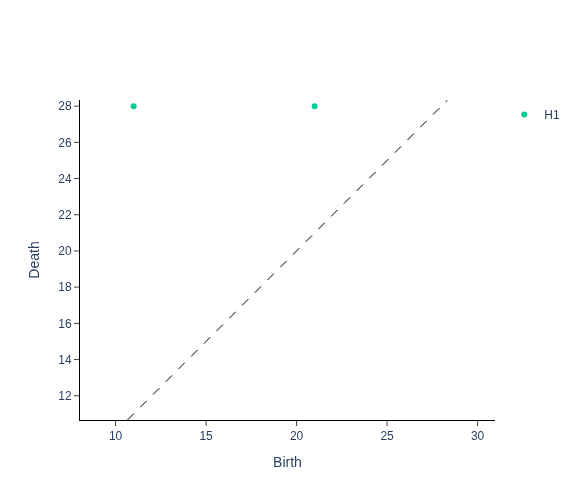

In [610]:
img8_height_4_pd = cubical_persistence.fit_transform(img8_height_4)

cubical_persistence.plot(img8_height_4_pd)

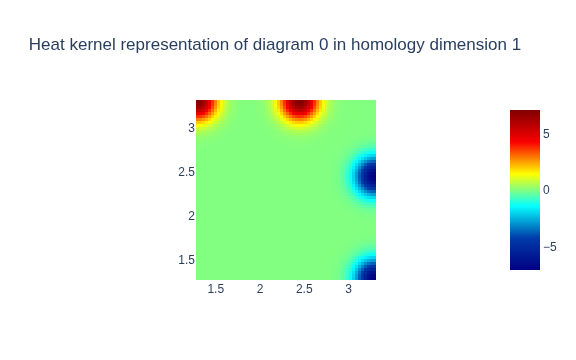

In [611]:
img8_height_4_pd = scaler.fit_transform(img8_height_4_pd)
img8_height_4_pd_heat = heat.fit_transform(img8_height_4_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_4_pd_heat, homology_dimension_idx=1, colorscale='jet')

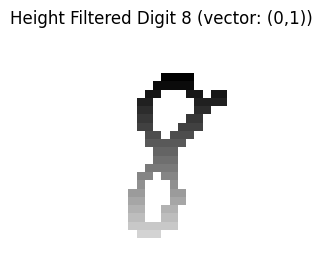

In [612]:
height_filtration = HeightFiltration(np.array([0, 1]))
img8_height_5 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_5.reshape(28,28), title="Height Filtered Digit 8 (vector: (0,1))", saving="img8_tda_height_5.png")

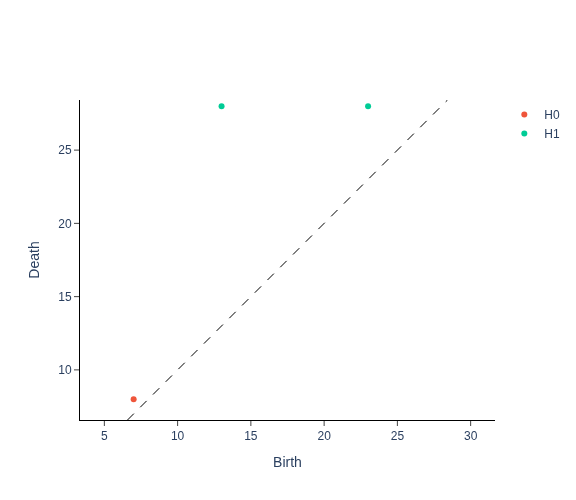

In [613]:
img8_height_5_pd = cubical_persistence.fit_transform(img8_height_5)

cubical_persistence.plot(img8_height_5_pd)

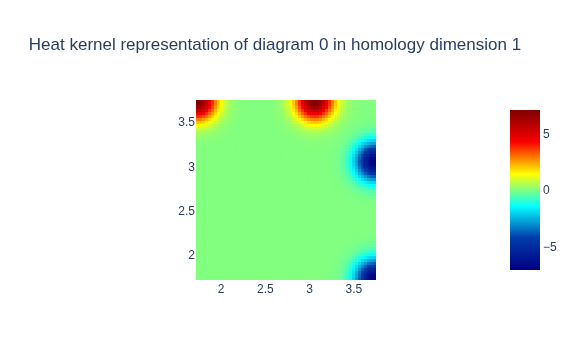

In [614]:
img8_height_5_pd = scaler.fit_transform(img8_height_5_pd)
img8_height_5_pd_heat = heat.fit_transform(img8_height_5_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_5_pd_heat, homology_dimension_idx=1, colorscale='jet')

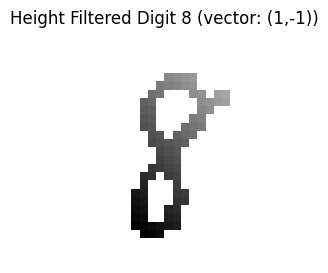

In [615]:
height_filtration = HeightFiltration(np.array([1, -1]))
img8_height_6 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_6.reshape(28,28), title="Height Filtered Digit 8 (vector: (1,-1))", saving="img8_tda_height_6.png")

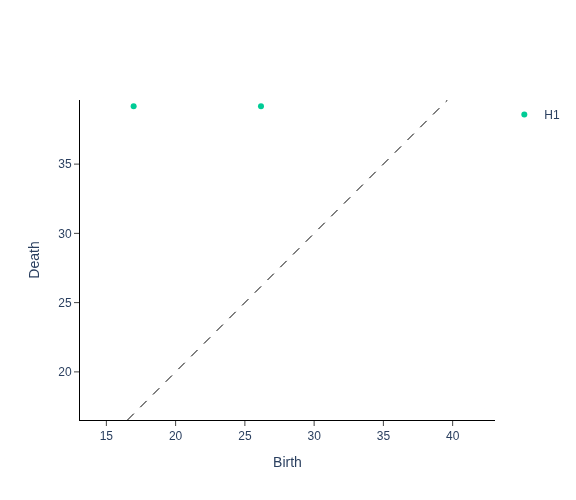

In [616]:
img8_height_6_pd = cubical_persistence.fit_transform(img8_height_6)

cubical_persistence.plot(img8_height_6_pd)

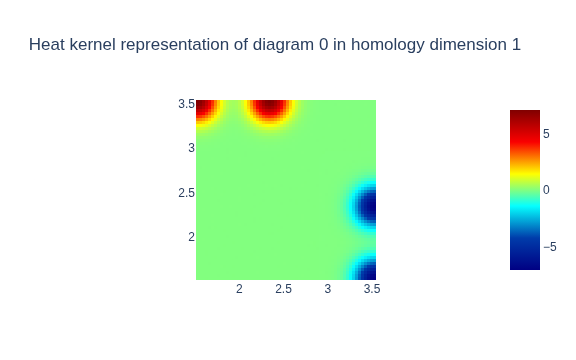

In [617]:
img8_height_6_pd = scaler.fit_transform(img8_height_6_pd)
img8_height_6_pd_heat = heat.fit_transform(img8_height_6_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_3_pd_heat, homology_dimension_idx=1, colorscale='jet')

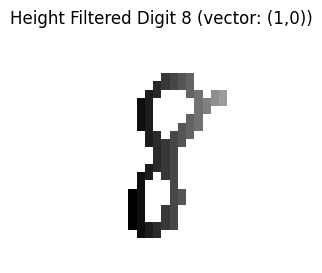

In [618]:
height_filtration = HeightFiltration(np.array([1, 0]))
img8_height_7 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_7.reshape(28,28), title="Height Filtered Digit 8 (vector: (1,0))", saving="img8_tda_height_7.png")

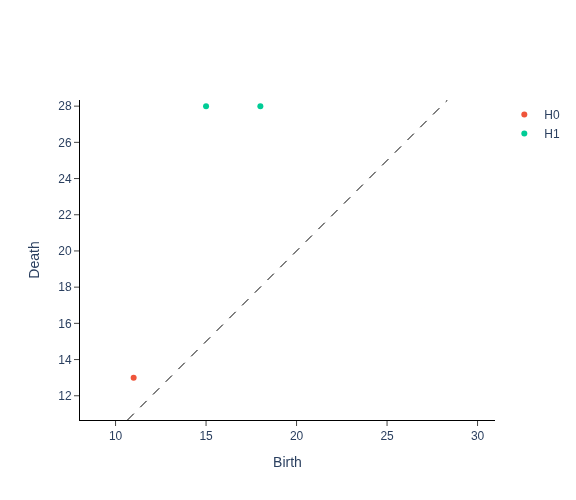

In [619]:
img8_height_7_pd = cubical_persistence.fit_transform(img8_height_7)

cubical_persistence.plot(img8_height_7_pd)

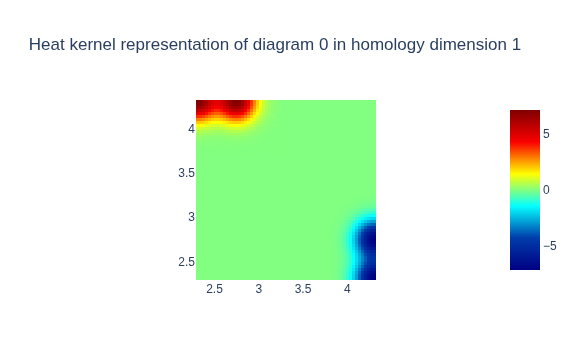

In [620]:
img8_height_7_pd = scaler.fit_transform(img8_height_7_pd)
img8_height_7_pd_heat = heat.fit_transform(img8_height_7_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_7_pd_heat, homology_dimension_idx=1, colorscale='jet')

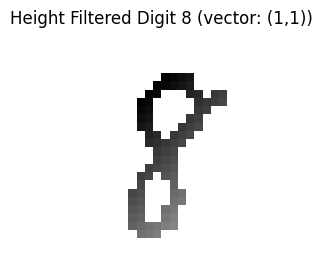

In [621]:
height_filtration = HeightFiltration(np.array([1, 1]))
img8_height_8 = height_filtration.fit_transform(img8_binarized)
show_image(img8_height_8.reshape(28,28), title="Height Filtered Digit 8 (vector: (1,1))", saving="img8_tda_height_8.png")

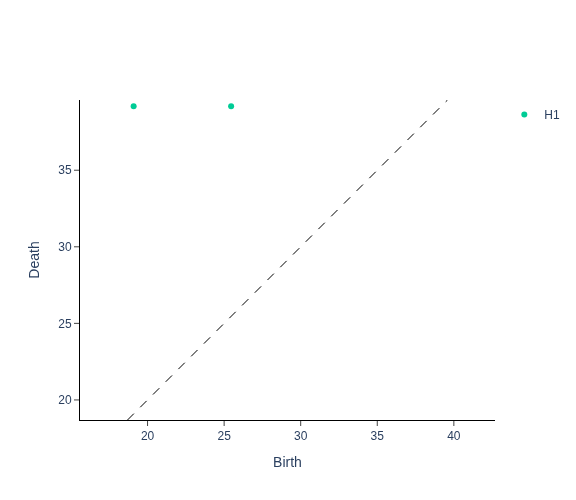

In [622]:
img8_height_8_pd = cubical_persistence.fit_transform(img8_height_8)

cubical_persistence.plot(img8_height_8_pd)

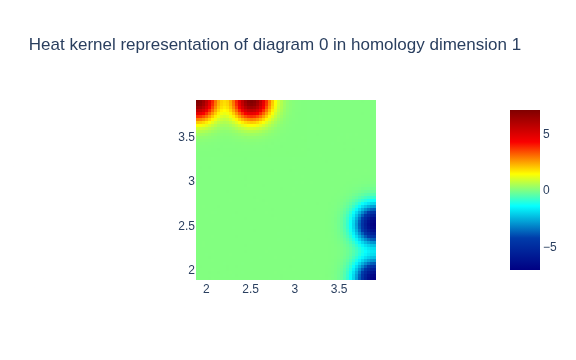

In [623]:
img8_height_8_pd = scaler.fit_transform(img8_height_8_pd)
img8_height_8_pd_heat = heat.fit_transform(img8_height_8_pd)

# Visualise the heat kernel for H1
heat.plot(img8_height_8_pd_heat, homology_dimension_idx=1, colorscale='jet')

In [624]:
from gtda.images import DensityFiltration

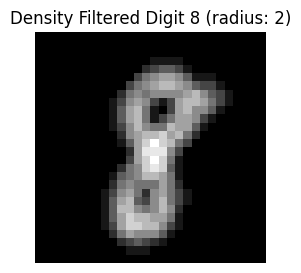

In [625]:
density_filtration = DensityFiltration(2)
img8_density_1 = density_filtration.fit_transform(img8_binarized)
show_image(img8_density_1.reshape(28,28), title="Density Filtered Digit 8 (radius: 2)", saving="img8_tda_density_1.png")

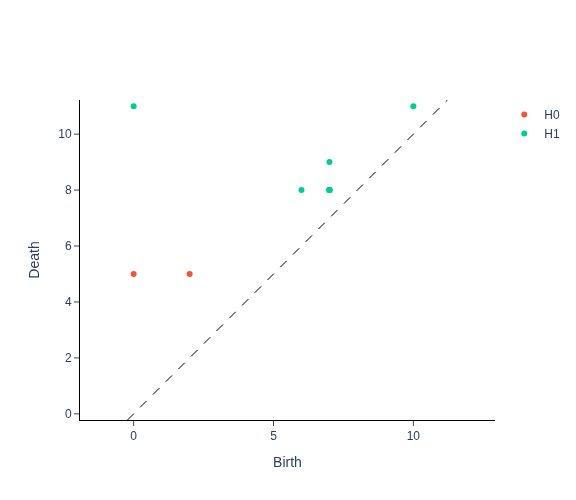

In [626]:
img8_density_1_pd = cubical_persistence.fit_transform(img8_density_1)

cubical_persistence.plot(img8_density_1_pd)

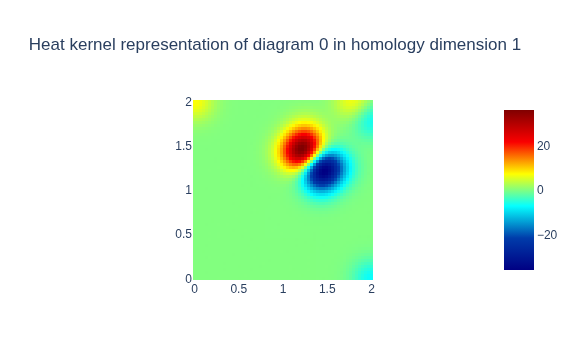

In [627]:
img8_density_1_pd = scaler.fit_transform(img8_density_1_pd)
img8_density_1_pd_heat = heat.fit_transform(img8_density_1_pd)

# Visualise the heat kernel for H1
heat.plot(img8_density_1_pd_heat, homology_dimension_idx=1, colorscale='jet')

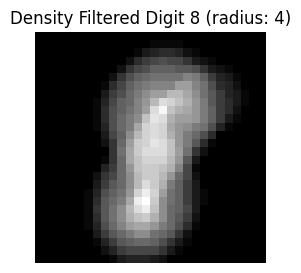

In [628]:
density_filtration = DensityFiltration(4)
img8_density_2 = density_filtration.fit_transform(img8_binarized)
show_image(img8_density_2.reshape(28,28), title="Density Filtered Digit 8 (radius: 4)", saving="img8_tda_density_2.png")

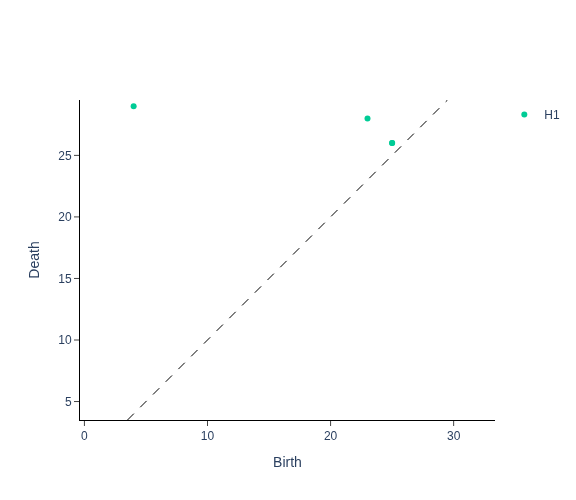

In [629]:
img8_density_2_pd = cubical_persistence.fit_transform(img8_density_2)

cubical_persistence.plot(img8_density_2_pd)

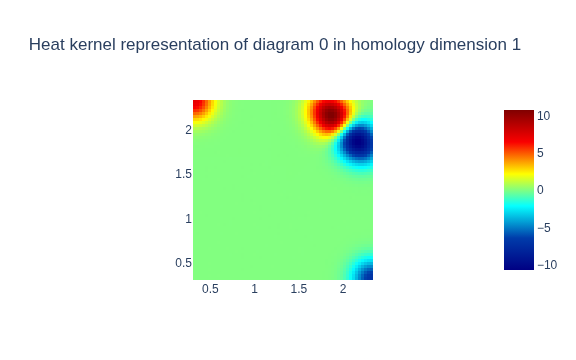

In [630]:
img8_density_2_pd = scaler.fit_transform(img8_density_2_pd)
img8_density_2_pd_heat = heat.fit_transform(img8_density_2_pd)

# Visualise the heat kernel for H1
heat.plot(img8_density_2_pd_heat, homology_dimension_idx=1, colorscale='jet')

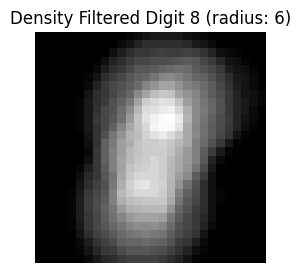

In [631]:
density_filtration = DensityFiltration(6)
img8_density_3 = density_filtration.fit_transform(img8_binarized)
show_image(img8_density_3.reshape(28,28), title="Density Filtered Digit 8 (radius: 6)", saving="img8_tda_density_3.png")

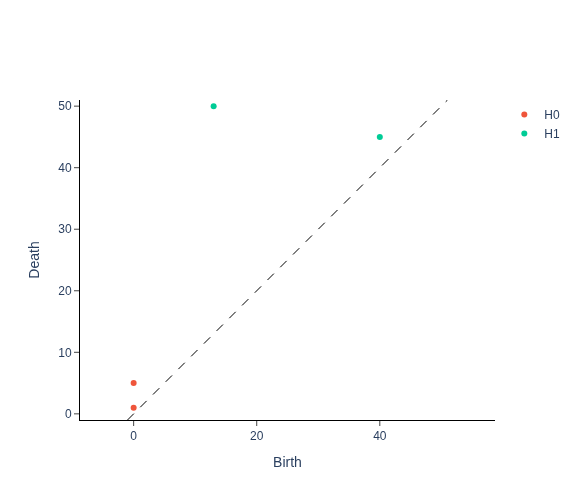

In [632]:
img8_density_3_pd = cubical_persistence.fit_transform(img8_density_3)

cubical_persistence.plot(img8_density_3_pd)

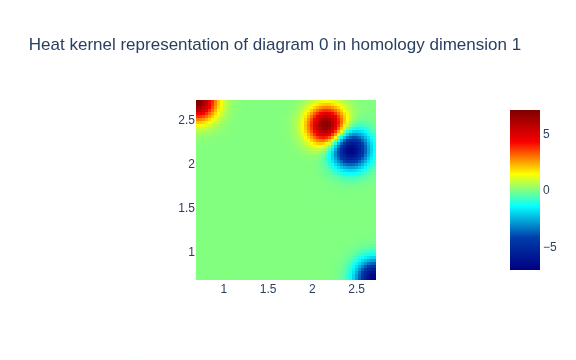

In [633]:
img8_density_3_pd = scaler.fit_transform(img8_density_3_pd)
img8_density_3_pd_heat = heat.fit_transform(img8_density_3_pd)

# Visualise the heat kernel for H1
heat.plot(img8_density_3_pd_heat, homology_dimension_idx=1, colorscale='jet')

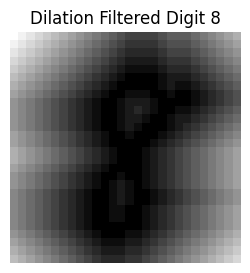

In [634]:
from gtda.images import DilationFiltration
dilation_filtration = DilationFiltration()
img8_dilation_1 = dilation_filtration.fit_transform(img8_binarized)
show_image(img8_dilation_1.reshape(28,28), title="Dilation Filtered Digit 8", saving="img8_tda_dilation_3.png")

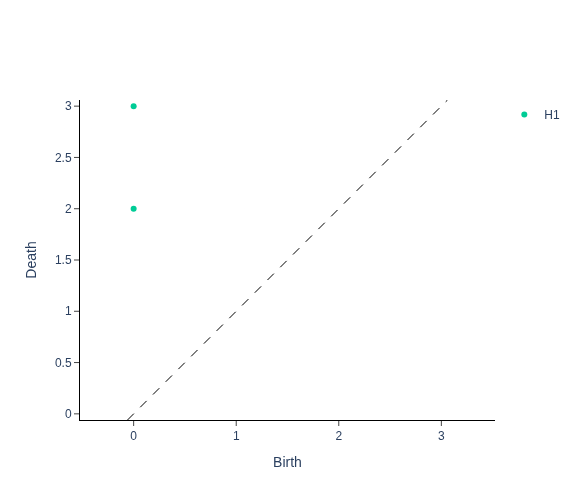

In [635]:
img8_dilation_1_pd = cubical_persistence.fit_transform(img8_dilation_1)

cubical_persistence.plot(img8_dilation_1_pd)

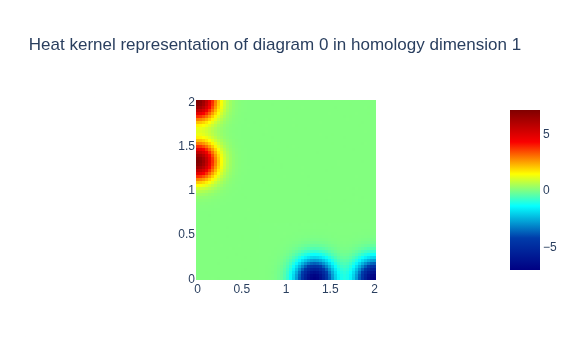

In [636]:
img8_dilation_1_pd = scaler.fit_transform(img8_dilation_1_pd)
img8_dilation_1_pd_heat = heat.fit_transform(img8_dilation_1_pd)

# Visualise the heat kernel for H1
heat.plot(img8_dilation_1_pd_heat, homology_dimension_idx=1, colorscale='jet')

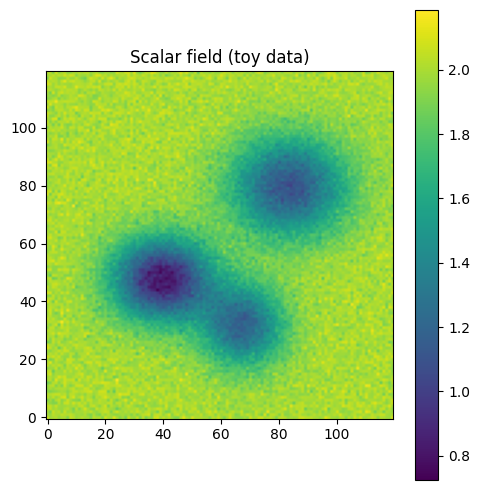

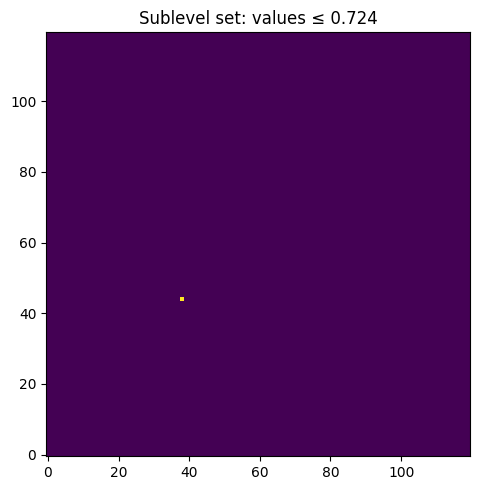

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

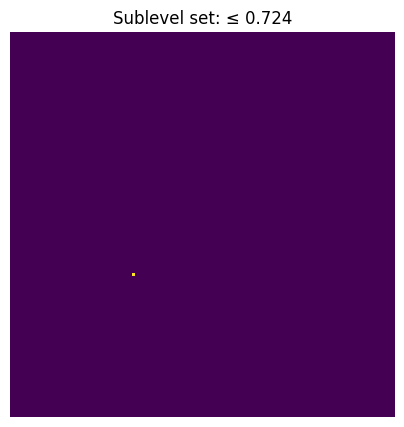

In [637]:
# Cubical persistence (H0) — visual simulation for a 2D scalar field
# - Sublevel filtration on a grid (cubical complex)
# - Exact 0D persistence via union–find + elder rule
# - Visual snapshots of the filtration
#
# Notes:
# * This is an educational demo focusing on H0 (connected components).
# * H1 (loops) requires additional machinery; here we show H1 only as Betti(t) counts (optional).
# * No seaborn; only matplotlib. One figure per chart (no subplots).

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --------------------------
# 1) Create a synthetic 2D scalar field with multiple valleys
# --------------------------
np.random.seed(7)
n = 120
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)

def gaussian(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0) ** 2) / (2 * sx ** 2) + ((Y - y0) ** 2) / (2 * sy ** 2)))

# High baseline + small noise, minus a few "valleys" (so sublevel sets begin at the valley minima)
field = 2.0 + 0.05 * np.random.randn(n, n) \
        - gaussian(-0.5, -0.3, 0.3, 0.25, 1.2) \
        - gaussian(0.6, 0.5, 0.35, 0.3, 0.9) \
        - gaussian(0.2, -0.7, 0.25, 0.25, 0.8)

vmin, vmax = float(field.min()), float(field.max())

# --------------------------
# 2) Display the scalar field
# --------------------------
plt.figure(figsize=(5, 5))
plt.title("Scalar field (toy data)")
plt.imshow(field, origin="lower")
plt.colorbar()
plt.tight_layout()
plt.show()

# --------------------------
# 3) Sublevel-set snapshots (binary masks for several thresholds)
# --------------------------
levels = np.linspace(vmin, vmax, 6)
frames = []

for i, t in enumerate(levels):
    mask = field <= t
    plt.figure(figsize=(5, 5))
    plt.title(f"Sublevel set: values ≤ {t:.3f}")
    plt.imshow(mask.astype(float), origin="lower")
    plt.tight_layout()
    plt.show()

    # Save frame for GIF
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(mask.astype(float), origin="lower")
    plt.title(f"Sublevel set: ≤ {t:.3f}")
    plt.axis("off")
    fig.canvas.draw()
    # Convert canvas to image
    w, h = fig.canvas.get_width_height()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(h, w, 3)
    frames.append(Image.fromarray(img))
    plt.close(fig)

# --------------------------
# 4) Exact H0 persistence via union–find + elder rule
# --------------------------
H, W = field.shape
flat_idx = np.arange(H * W).reshape(H, W)

# Sort pixels by value (ascending): sublevel filtration
order = np.argsort(field, axis=None)
added = np.zeros(H * W, dtype=bool)
parent = -np.ones(H * W, dtype=int)
birth = np.empty(H * W, dtype=float)
birth[:] = np.nan

def find(a):
    while parent[a] != a:
        parent[a] = parent[parent[a]]
        a = parent[a]
    return a

def union(a, b, current_level, pairs):
    ra, rb = find(a), find(b)
    if ra == rb:
        return
    # Elder rule: older (smaller birth) survives
    if birth[ra] <= birth[rb]:
        # rb dies at current_level
        pairs.append((birth[rb], current_level))
        parent[rb] = ra
    else:
        pairs.append((birth[ra], current_level))
        parent[ra] = rb

pairs = []  # list of (birth, death)
for idx in order:
    added[idx] = True
    parent[idx] = idx
    birth[idx] = field.ravel()[idx]  # new component born
    r, c = divmod(idx, W)
    # 4-neighborhood
    for dr, dc in ((1,0), (-1,0), (0,1), (0,-1)):
        rr, cc = r + dr, c + dc
        if 0 <= rr < H and 0 <= cc < W:
            j = rr * W + cc
            if added[j]:
                union(idx, j, field.ravel()[idx], pairs)

# Surviving components die at +∞; for plotting, cap at vmax
inf_death = vmax + 1e-6
for i in range(H * W):
    if added[i] and find(i) == i:  # root that remains
        pairs.append((birth[i], inf_death))

pairs = np.array(pairs, dtype=float)
pairs = pairs[pairs[:,0].argsort()]  # sort by birth

# --------------------------
# 5) Plot barcode (H0) and persistence diagram (H0)
# --------------------------
# Barcode
plt.figure(figsize=(6, 6))
plt.title("H0 Barcode (sublevel)")
y = 0
for (b, d) in pairs:
    plt.plot([b, d], [y, y], linewidth=1)
    y += 1
plt.xlabel("Filtration value")
plt.ylabel("Component index (arbitrary)")
plt.xlim(vmin, inf_death)
plt.tight_layout()
plt.show()

# Persistence diagram
plt.figure(figsize=(6, 6))
plt.title("H0 Persistence Diagram (sublevel)")
plt.scatter(pairs[:,0], pairs[:,1], s=8)
plt.plot([vmin, inf_death], [vmin, inf_death], linestyle="--")
plt.xlabel("Birth")
plt.ylabel("Death")
plt.xlim(vmin, inf_death)
plt.ylim(vmin, inf_death)
plt.tight_layout()
plt.show()

# --------------------------
# 6) Optional: Betti-1 estimates across thresholds (not true H1 persistence)
#    We approximate holes as (# of background components excluding the outside)
# --------------------------
def count_components(binary):
    # 4-connected components for True
    H, W = binary.shape
    labels = -np.ones((H, W), dtype=int)
    comp = 0
    for r in range(H):
        for c in range(W):
            if binary[r, c] and labels[r, c] == -1:
                # BFS
                comp += 1
                stack = [(r, c)]
                labels[r, c] = comp
                while stack:
                    rr, cc = stack.pop()
                    for dr, dc in ((1,0), (-1,0), (0,1), (0,-1)):
                        r2, c2 = rr + dr, cc + dc
                        if 0 <= r2 < H and 0 <= c2 < W and binary[r2, c2] and labels[r2, c2] == -1:
                            labels[r2, c2] = comp
                            stack.append((r2, c2))
    return comp

def count_holes(binary):
    # Holes in a foreground binary ≈ (# connected components in background) - 1 (the outside)
    bg = ~binary
    H, W = bg.shape
    labels = -np.ones((H, W), dtype=int)
    comp = 0
    for r in range(H):
        for c in range(W):
            if bg[r, c] and labels[r, c] == -1:
                comp += 1
                stack = [(r, c)]
                labels[r, c] = comp
                while stack:
                    rr, cc = stack.pop()
                    for dr, dc in ((1,0), (-1,0), (0,1), (0,-1)):
                        r2, c2 = rr + dr, cc + dc
                        if 0 <= r2 < H and 0 <= c2 < W and bg[r2, c2] and labels[r2, c2] == -1:
                            labels[r2, c2] = comp
                            stack.append((r2, c2))
    return max(comp - 1, 0)

ts = np.linspace(vmin, vmax, 60)
betti0, betti1 = [], []
for t in ts:
    binmask = field <= t
    betti0.append(count_components(binmask))
    betti1.append(count_holes(binmask))

plt.figure(figsize=(6, 4))
plt.title("Betti numbers vs threshold (approx.)")
plt.plot(ts, betti0, label="β0 (components)")
plt.plot(ts, betti1, label="β1 (holes)")
plt.xlabel("Threshold t")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 7) Save a GIF of the filtration snapshots
# --------------------------
gif_path = "./cubical_persistence_sublevel.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=600, loop=0)
